In [338]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [339]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    return np.array(y_noise)


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise = normal(y, mu, var)
    return x, y, y_noise

In [340]:
nodes = 50
mu = 0
var = 0.01


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [341]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [342]:
m = 10
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.05954499564416571


In [343]:
def display(m, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


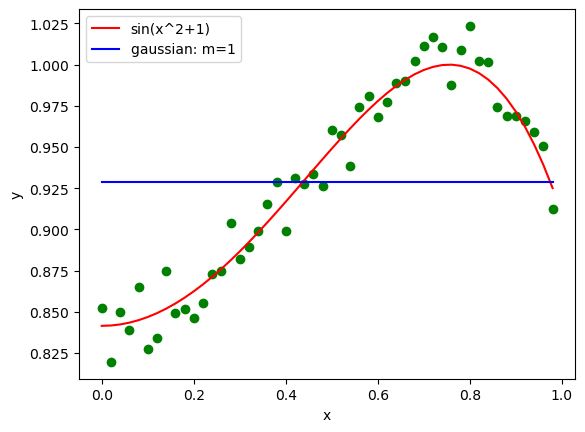

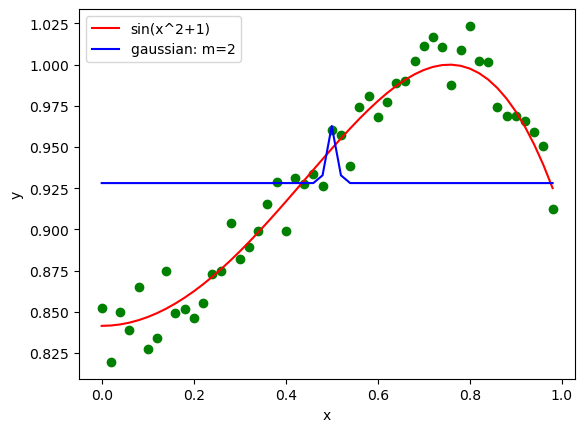

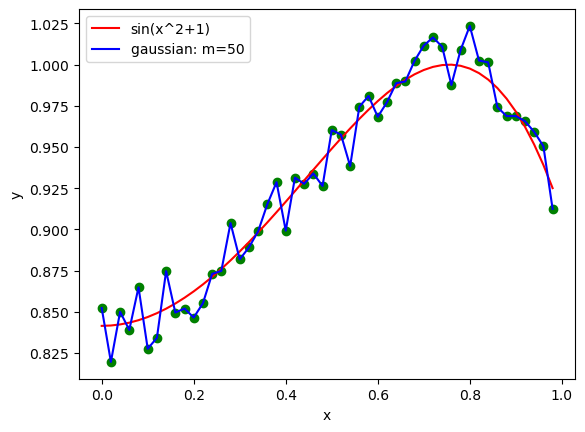

In [344]:
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)
params = [1, 5, 10, 21]
for m in params:
    w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')

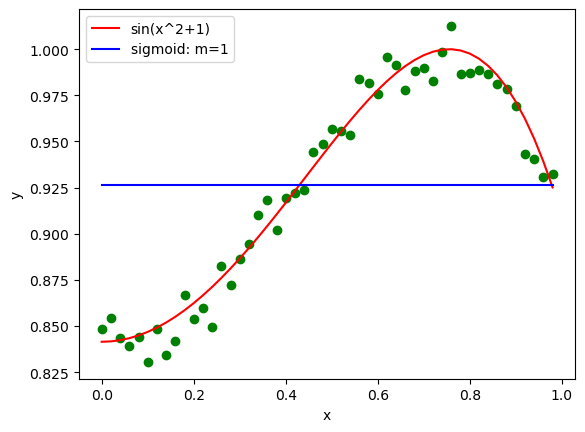

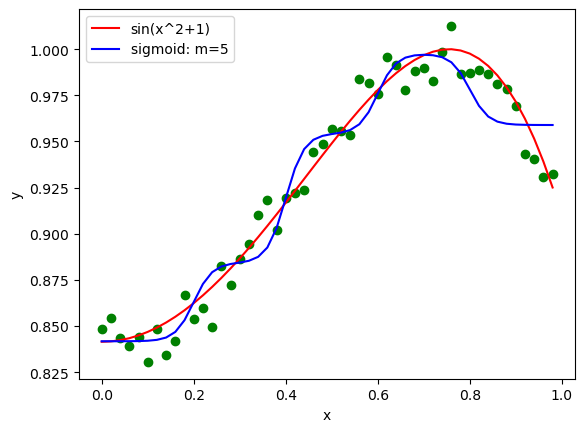

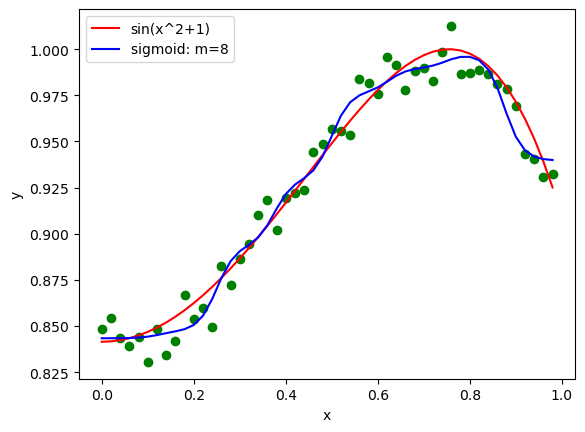

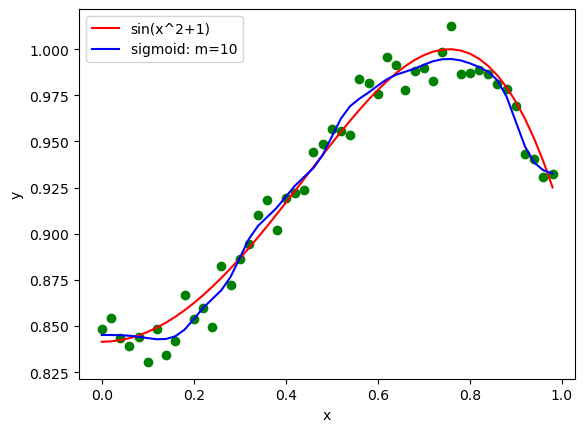

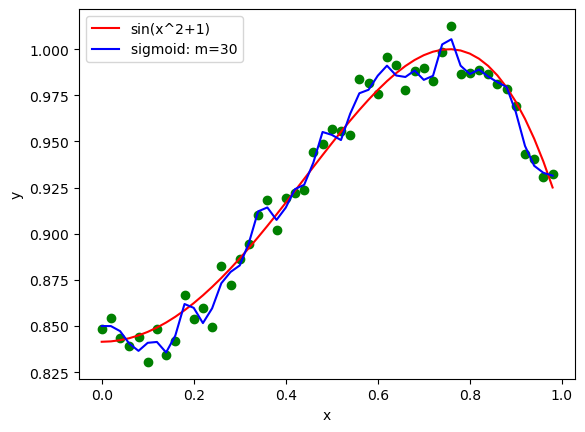

In [345]:
x, y_origin, y_noise = get_data(nodes, mu, var, 1.0, p_1)

params = [1, 5, 8, 10, 30]
for m in params:
    w_, X = mle_mine(m, x, y_noise, 4e-4, sigmoid, 1.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'sigmoid', 'sin(x^2+1)')

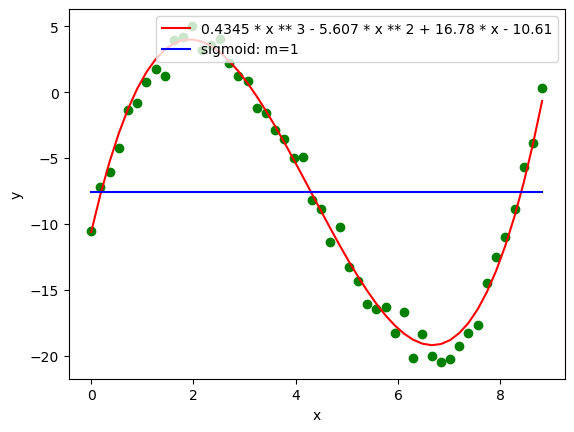

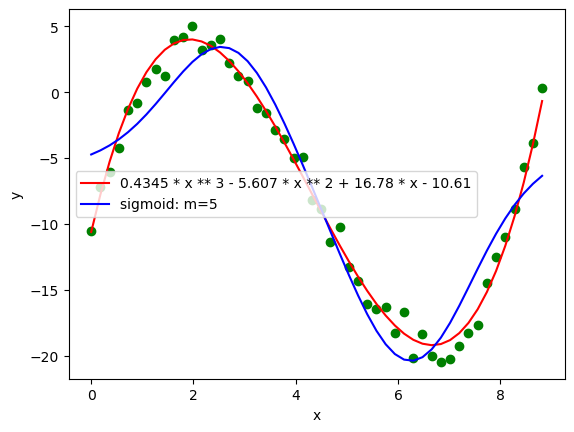

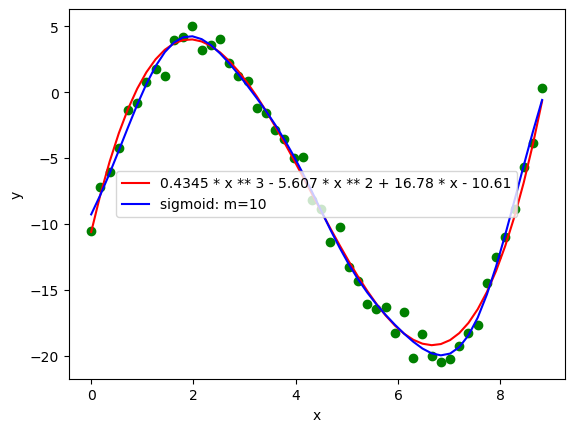

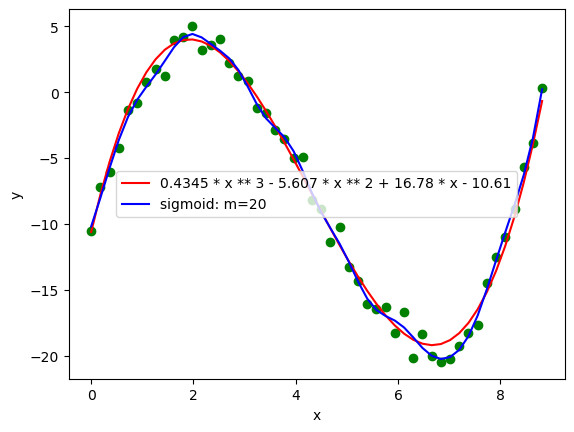

In [346]:
def p_2(x_):
    return 0.4345 * x_ ** 3 - 5.607 * x_ ** 2 + 16.78 * x_ - 10.61


x, y_origin, y_noise = get_data(nodes, mu, 1, 9, p_2)
params = [1, 5, 10, 24]
for m in params:
    w_, X = mle_mine(m, x, y_noise, 0.5, sigmoid, 9.0)
    y_ = X @ w_
    display(m, x, y_, y_origin, y_noise, 'sigmoid', '0.4345 * x ** 3 - 5.607 * x ** 2 + 16.78 * x - 10.61')